In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K) # raw vector
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
xt (50000, 3072)
yt (50000, 10)


In [2]:
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-5
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1) + b1 
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg*np.sum(w1*w1)
    loss_history.append(loss)

    if t % 10 == 0:
        print("Loss after {} iteration {}".format(t, loss))
        train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y, axis=1))/(K-1)))
        train_acc_history.append(train_acc)
        print("Training accuracy : ",train_acc)
    # Backward pass
    dy_pred = (2.0/batch_size)*(y_pred - y)
    dw1 = x.T.dot(dy_pred)  # D x K
    db1 = dy_pred.sum(axis=0) # 1 x K coloumn wise summation 

    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    lr = lr*lr_decay 

Loss after 0 iteration 0.9999910051883305
Training accuracy :  0.63144
Loss after 10 iteration 0.9655883879402072
Training accuracy :  0.69036
Loss after 20 iteration 0.9490474062572325
Training accuracy :  0.6989399999999999
Loss after 30 iteration 0.9375995396612342
Training accuracy :  0.70468
Loss after 40 iteration 0.9286186406037673
Training accuracy :  0.7091466666666667
Loss after 50 iteration 0.921139794345419
Training accuracy :  0.71312
Loss after 60 iteration 0.9146822420877757
Training accuracy :  0.7161511111111112
Loss after 70 iteration 0.9089716450012717
Training accuracy :  0.7180955555555555
Loss after 80 iteration 0.9038373686629847
Training accuracy :  0.7201244444444446
Loss after 90 iteration 0.8991657631144578
Training accuracy :  0.7222911111111111
Loss after 100 iteration 0.894876792060428
Training accuracy :  0.7242533333333334
Loss after 110 iteration 0.8909115256373332
Training accuracy :  0.7252933333333333
Loss after 120 iteration 0.8872250220209718
Train

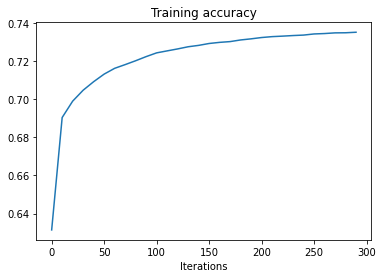

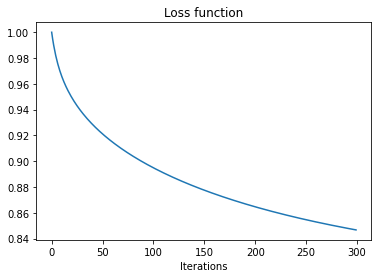

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

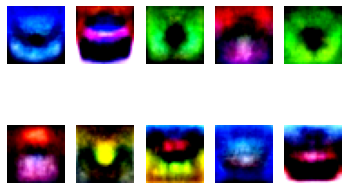

Training accuracy :  0.7353755555555556
Test accuracy :  0.7671


In [3]:
plt.plot(np.arange(0,300,10),train_acc_history)
plt.title("Training accuracy"), plt.xlabel("Iterations")
plt.show()
plt.plot(loss_history)
plt.title("Loss function"), plt.xlabel("Iterations")
plt.show()

fg, ax = plt.subplots(2,5)

for i in range(2):
    for j in range(5):
        img = w1[:,5*i+j].reshape(32,32,3)
        ax[i,j].imshow(img*1000)
        ax[i,j].axis("off")
plt.show()

y_pred = x_train.dot(w1) + b1 
train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1))/(K-1)))
print("Training accuracy : ",train_acc)
y_pred_test = x_test.dot(w1) + b1 
test_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1))/10))
print("Test accuracy : ",test_acc)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
xt (50000, 3072)
yt (50000, 10)


In [2]:
H = 200
std = 1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H) # raw vector
w2 = std*np.random.randn(H,K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr

iterations = 300
lr = 0.001
lr_decay= 0.999
reg = 5e-5
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    h = 1./(1 + np.exp(-x.dot(w1) - b1))
    y_pred = h.dot(w2) + b2
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg*(np.sum(w1*w1) + np.sum(w2*w2))
    loss_history.append(loss)

    if t % 10 == 0:
        print("Loss after {} iteration {}".format(t, loss))
        train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y, axis=1))/10))
        train_acc_history.append(train_acc)
        print("Training accuracy : ",train_acc)
    # Backward pass
    dy_pred = (2.0/batch_size)*(y_pred - y)
    dw2 = h.T.dot(dy_pred) +  reg*w2 # H x K
    db2 = dy_pred.sum(axis=0) # 1 x K, coloumn wise summation 
    dh = dy_pred.dot(w2.T) # Ntr x H
    dw1 = x.T.dot(dh*h*(h-1)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis = 0)

    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    
    lr = lr*lr_decay

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Loss after 0 iteration 0.999996440078859
Training accuracy :  0.6900000000000001
Loss after 10 iteration 0.9814579598227718
Training accuracy :  0.69
Loss after 20 iteration 0.9663563538402422
Training accuracy :  0.69
Loss after 30 iteration 0.9540544548185439
Training accuracy :  0.69
Loss after 40 iteration 0.9440332212469564
Training accuracy :  0.69
Loss after 50 iteration 0.9358698376311865
Training accuracy :  0.69
Loss after 60 iteration 0.9292198748717774
Training accuracy :  0.69
Loss after 70 iteration 0.9238027580312101
Training accuracy :  0.69
Loss after 80 iteration 0.9193899282944611
Training accuracy :  0.69
Loss after 90 iteration 0.915795199622618
Training accuracy :  0.6900000000000001
Loss after 100 iteration 0.9128669032106786
Training accuracy :  0.69
Loss after 110 iteration 0.9104814882994817
Training accuracy :  0.69
Loss after 120 iteration 0.9085383093427776
Training accuracy :  0.69


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
xt (50000, 3072)
yt (50000, 10)


In [2]:
H = 200
std = 1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H) # raw vector
w2 = std*np.random.randn(H,K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500

iterations = 300
lr = 0.001
lr_decay= 0.999
reg = 5e-5
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    seed += 1
    loss_1 = 0
    for st in range(0,Ntr+1, batch_size):
        # Forward pass
        end = st + batch_size
        x = x_train[st:end:,]
        y = y_train[st:end:,]
        h = 1./(1 + np.exp(-x.dot(w1) - b1))
        y_pred = h.dot(w2) + b2
        loss = 1./batch_size*np.square(y_pred - y).sum() + reg*(np.sum(w1*w1) + np.sum(w2*w2))
        loss_1 += loss
        
        # Backward pass
        dy_pred = (2.0/batch_size)*(y_pred - y)
        dw2 = h.T.dot(dy_pred) +  reg*w2 # H x K
        db2 = dy_pred.sum(axis=0) # 1 x K, coloumn wise summation 
        dh = dy_pred.dot(w2.T) # Ntr x H
        dw1 = x.T.dot(dh*h*(h-1)) + reg*w1
        db1 = (dh*h*(1-h)).sum(axis = 0)

        w1 = w1 - lr*dw1
        b1 = b1 - lr*db1
        w2 = w2 - lr*dw2
        b2 = b2 - lr*db2
        lr = lr*lr_decay
    loss_avg = loss_1/Ntr
    loss_history.append(loss_avg)
    if t % 10 == 0:
            print("Loss after {} iteration {}".format(t, loss_avg))
            #train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y, axis=1))/10))
            #train_acc_history.append(train_acc)
            #print("Training accuracy : ",train_acc)

fter 6500 mini iteration 0.9011561942577446
Loss after 7000 mini iteration 0.9000055962606112
Loss after 7500 mini iteration 0.9031524005733501
Loss after 8000 mini iteration 0.9024727130892473
Loss after 8500 mini iteration 0.9031108891906049
Loss after 9000 mini iteration 0.9031173594409769
Loss after 9500 mini iteration 0.9003490941330043
Loss after 10000 mini iteration 0.9008523677425616
Loss after 10500 mini iteration 0.9009497415242437
Loss after 11000 mini iteration 0.9012961642078533
Loss after 11500 mini iteration 0.9058147506403157
Loss after 12000 mini iteration 0.9004289134016046
Loss after 12500 mini iteration 0.9025889896678038
Loss after 13000 mini iteration 0.8994731875562058
Loss after 13500 mini iteration 0.9026449979053254
Loss after 14000 mini iteration 0.9010299527383386
Loss after 14500 mini iteration 0.900659688115148
Loss after 15000 mini iteration 0.901604119070236
Loss after 15500 mini iteration 0.9034259489365899
Loss after 16000 mini iteration 0.900529095017

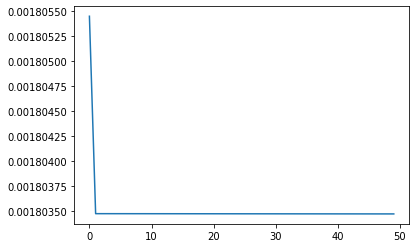

Training accuracy :  0.63
Test accuracy :  0.6300000000000001


In [3]:
plt.plot(loss_history)
#plt.plot(train_acc)
plt.show()

h = 1./(1 + np.exp(-x_train.dot(w1) - b1))
y_pred = h.dot(w2) + b2

train_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1))/10))
print("Training accuracy : ",train_acc)
h = 1./(1 + np.exp(-x_test.dot(w1) - b1))
y_pred_test = h.dot(w2) + b2

test_acc = 1.0 - np.mean(np.abs((np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1))/10))
print("Test accuracy : ",test_acc)

In [20]:

%matplotlib inline 
%load_ext tensorboard
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import numpy as np 
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
#x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
x_train, x_test = x_train/255., x_test/255.

model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10))

model.compile(
    optimizer = tf.keras.optimizers.SGD(momentum = 0.9),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
    metrics= ["accuracy"]
)
print(model.summary())


model.fit(x_train, y_train, epochs = 5, batch_size = 50)

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size = 50,verbose = 2)
print("\nTest accuracy = ", test_acc)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 2, 2, 64)          0         
______________________________